# RAW to RGB

To convert a RAW image from bayer patern to RGB, opencv can be used.

First is to convert th RAW data in a more readable form. 

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Import cv2 (opencv) to read the image and convert it in RGB
import cv2

# The os module is used to execure dcraw
import os

import matplotlib.pyplot as plt
import numpy as np

In [3]:
sourcepath = "./Test_Images"
sourcefile = "Non_Defiltered"

The command dcraw can convert some RAW file to differente file format. To extract the raw data the following command can be used:

dcraw -d -4 rawfile.CR2

A rawfile.pgm will be generated. The -d option indicate a raw export (without debayerization). The -4 option produce a 16 bit image without white balance and with a gamma of 1. 

In [4]:
os.system('dcraw -d -4 ' + sourcepath +'/' + sourcefile + '.CR2')

0

Read the result file. dcraw write in a 16 bit PGM file

In [5]:
image = cv2.imread("./Test_Images/Non_Defiltered.pgm", cv2.IMREAD_UNCHANGED)

The IMREAD_UNCHANGED keep the values as they are and not normalize them.

In [6]:
image

array([[20048, 23554, 20450, ...,  5209,  6164,  5161],
       [23517, 31516, 23420, ...,  4973,  5348,  4755],
       [18426, 24406, 20905, ...,  5289,  5414,  5177],
       ..., 
       [ 9112, 10220,  9876, ..., 11763, 11632, 11544],
       [ 9545, 10848,  9925, ..., 12201, 11147, 12013],
       [ 9648,  9202,  9179, ..., 10611, 11377, 10568]], dtype=uint16)

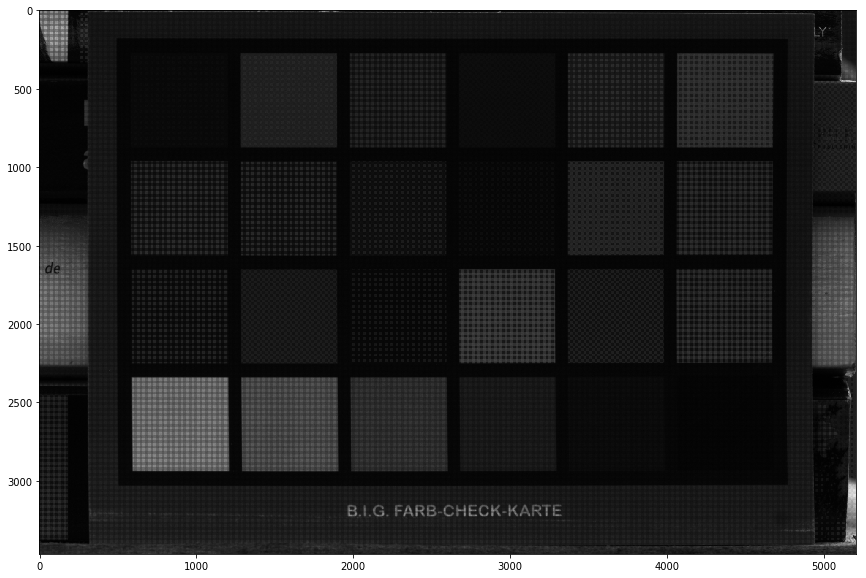

In [7]:
plt.figure(figsize=(20,10))
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [80]:
RGB_image = cv2.cvtColor(image, cv2.COLOR_BayerBG2RGB)

In [81]:
RGB_image

array([[[19957, 23724, 31516],
        [19957, 23724, 31516],
        [20678, 23420, 31783],
        ..., 
        [ 5916,  5351,  4973],
        [ 5789,  5348,  4864],
        [ 5789,  5348,  4864]],

       [[19957, 23724, 31516],
        [19957, 23724, 31516],
        [20678, 23420, 31783],
        ..., 
        [ 5916,  5351,  4973],
        [ 5789,  5348,  4864],
        [ 5789,  5348,  4864]],

       [[19666, 24406, 32133],
        [19666, 24406, 32133],
        [20905, 23624, 32210],
        ..., 
        [ 5709,  5289,  4924],
        [ 5414,  5226,  4898],
        [ 5414,  5226,  4898]],

       ..., 
       [[ 9494, 10220, 10871],
        [ 9494, 10220, 10871],
        [ 9876,  9708, 10792],
        ..., 
        [11639, 11763, 12212],
        [11632, 11315, 12195],
        [11632, 11315, 12195]],

       [[ 9454,  9723, 10848],
        [ 9454,  9723, 10848],
        [ 9528,  9925, 10600],
        ..., 
        [11143, 11177, 12201],
        [11505, 11147, 12107],
        [1

Gamma Correction

In [82]:
bitDepth = 2**16
RGB_image = np.power(RGB_image/bitDepth, 1/2.1)*bitDepth

In [83]:
RGB_image=RGB_image.astype('uint16')

In [84]:
RGB_image

array([[[37203, 40396, 46246],
        [37203, 40396, 46246],
        [37837, 40148, 46432],
        ..., 
        [20850, 19877, 19196],
        [20636, 19872, 18994],
        [20636, 19872, 18994]],

       [[37203, 40396, 46246],
        [37203, 40396, 46246],
        [37837, 40148, 46432],
        ..., 
        [20850, 19877, 19196],
        [20636, 19872, 18994],
        [20636, 19872, 18994]],

       [[36944, 40945, 46675],
        [36944, 40945, 46675],
        [38034, 40315, 46728],
        ..., 
        [20500, 19767, 19105],
        [19988, 19655, 19057],
        [19988, 19655, 19057]],

       ..., 
       [[26118, 27050, 27858],
        [26118, 27050, 27858],
        [26613, 26396, 27761],
        ..., 
        [28778, 28924, 29444],
        [28770, 28394, 29425],
        [28770, 28394, 29425]],

       [[26065, 26416, 27829],
        [26065, 26416, 27829],
        [26162, 26676, 27525],
        ..., 
        [28187, 28228, 29432],
        [28620, 28192, 29323],
        [2

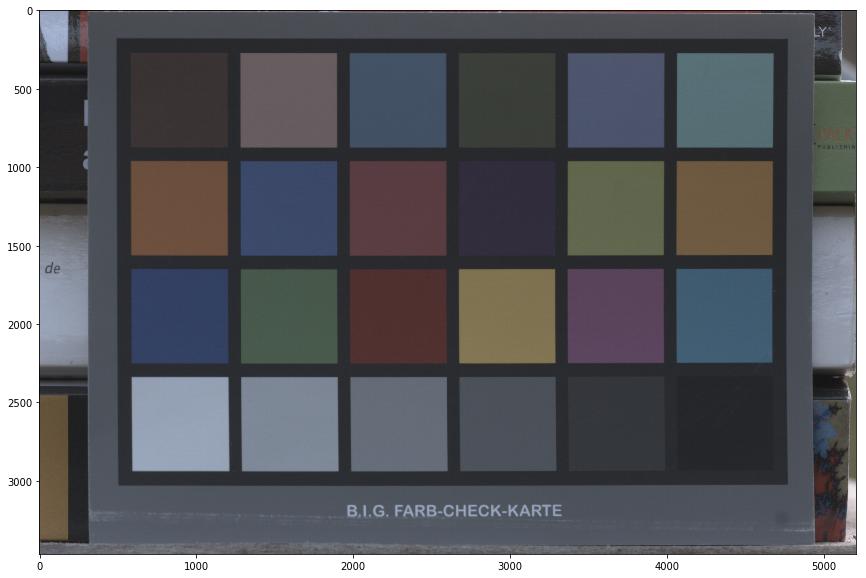

In [85]:
RGB_image8bit = np.round(-((RGB_image/2**16)*255))
plt.figure(figsize=(20,10))
plt.imshow(RGB_image8bit, interpolation='none')

In [86]:
cv2.imwrite("test2.png", RGB_image)

True